In [ ]:
#toxic_comments = fake_news
#only_toxic = only_fake
#text_toxic = text_fake
#notoxic = nofake

In [69]:
#test = pd.read_table(r"C:/Users/CptCu/Desktop/dataset/test.tsv")
#train_df = pd.read_table(r"C:/Users/CptCu/Desktop/dataset/train.tsv")

In [5]:
pip install nltk

     |████████████████████████████████| 1.5 MB 1.7 MB/s            
     |████████████████████████████████| 288 kB 11.4 MB/s            
     |████████████████████████████████| 96 kB 6.9 MB/s             
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

import re
import pymorphy2
from collections import Counter
# from wordcloud import WordCloud
from tqdm import tqdm

import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


In [12]:
from nltk.corpus import stopwords

In [24]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1129)>


False

In [8]:
fake_news = pd.read_table("train.tsv")
fake_news.head()

,title,is_fake
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1
1,Агент Кокорина назвал езду по встречке житейск...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело о недоносительст...,1


In [9]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    5758 non-null   object
 1   is_fake  5758 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.1+ KB


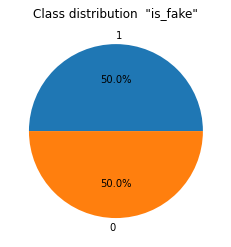

In [10]:
fake_news['is_fake'].value_counts().plot(kind='pie', title='Class distribution  "is_fake"', autopct='%1.1f%%')
plt.axis('off')
plt.show()

In [22]:
TOKEN_RE = re.compile(r'[а-яё]+')
russian_stopwords = stopwords.words("russian")
lemmatizer = pymorphy2.MorphAnalyzer()

def tokenize_text(txt, min_lenght_token=2):
    txt = txt.lower()
    all_tokens = TOKEN_RE.findall(txt)
    return [token for token in all_tokens if len(token) >= min_lenght_token]

def remove_stopwords(tokens):
    return list(filter(lambda token: token not in russian_stopwords, tokens))

def lemmatizing(tokens):
    return [lemmatizer.parse(token)[0].normal_form for token in tokens]

def text_cleaning(txt):
    tokens = tokenize_text(txt)
    tokens  = lemmatizing(tokens)
#     tokens = remove_stopwords(tokens)
    return ' '.join(tokens)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/v.chetverikov/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [17]:
tqdm.pandas()

df_token = fake_news.copy()
df_token['title'] = df_token['title'].progress_apply(text_cleaning)
df_token.head()

100%|██████████████████████████████████████| 5758/5758 [00:07<00:00, 744.35it/s]


,title,is_fake
0,москвич владимир клутина прийти счёт за вмешат...,1
1,агент кокорин назвать езда по встречка житейск...,0
2,госдума рассмотреть возможность введение секре...,1
3,фас заблокировать поставка скоростной трамвай ...,0
4,против навальный завести дело недоносительство...,1


In [20]:
clean_text = df_token.copy()
clean_text.head(10)

,title,is_fake
0,москвич владимир клутина прийти счёт за вмешат...,1
1,агент кокорин назвать езда по встречка житейск...,0
2,госдума рассмотреть возможность введение секре...,1
3,фас заблокировать поставка скоростной трамвай ...,0
4,против навальный завести дело недоносительство...,1
5,российский студент запретить учиться за рубеж,1
6,путин писать книга о история украина,1
7,россиянин обхитрить рост цена,0
8,звезда воронин раскрыть подробность свой состо...,0
9,объявить дата выход очко дополнить реальность,0


In [21]:
corpus = clean_text['title'].values

text = ' '.join(corpus)
counter = Counter(text.split())
sorted_counter = counter.most_common()
sorted_counter[:5]

[('на', 1247), ('за', 588), ('россия', 536), ('из', 419), ('по', 386)]

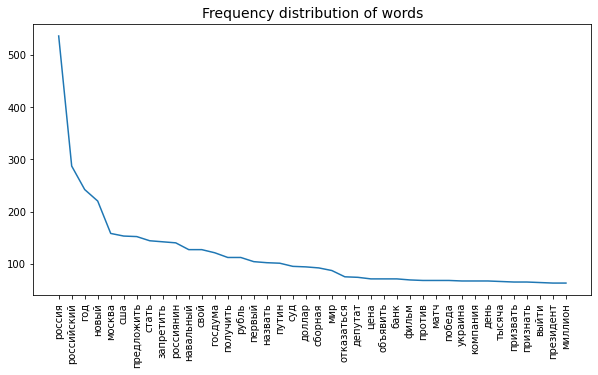

In [92]:
words = [pair[0] for pair in sorted_counter]
words_count = [pair[1] for pair in sorted_counter]

plt.figure(figsize=(10, 5))
plt.plot(words[:40], words_count[:40])
plt.xticks(rotation=90)
plt.title('Frequency distribution of words', fontsize=14)
plt.show()

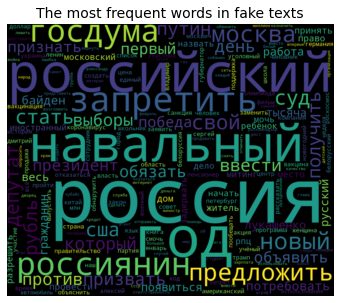

In [93]:
only_fake = clean_text[clean_text['is_fake'] == 1]
text_fake = ' '.join(only_fake['title'].values)

wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text_fake)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('The most frequent words in fake texts', fontsize=14)
plt.show()

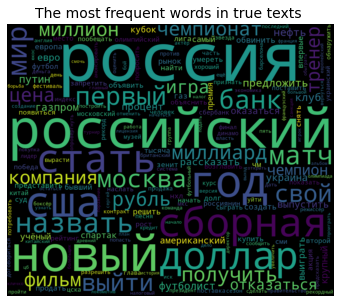

In [101]:
nofake = clean_text[clean_text['is_fake'] == 0]
norm_text = ' '.join(nofake['title'].values)

wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(norm_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('The most frequent words in true texts ', fontsize=14)
plt.show()

In [96]:
df_train, df_test =  train_test_split(clean_text, test_size=0.1, random_state=42)

In [97]:
train_corpus = df_train['title'].values
test_corpus = df_test['title'].values

y_train = df_train['is_fake']
y_test = df_test['is_fake']

In [98]:
vectorizer = TfidfVectorizer(ngram_range=(2,4), analyzer='char_wb', max_df=0.8, min_df=10)
X_train = vectorizer.fit_transform(train_corpus)
X_test = vectorizer.transform(test_corpus)

print('Total features: ', len(vectorizer.get_feature_names()))

Total features:  8359


In [99]:
Logregres = LogisticRegression(max_iter=10000, C=3, solver='liblinear')
Logregres.fit(X_train, y_train)
y_pred = Logregres.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       296
           1       0.84      0.83      0.84       280

    accuracy                           0.84       576
   macro avg       0.84      0.84      0.84       576
weighted avg       0.84      0.84      0.84       576



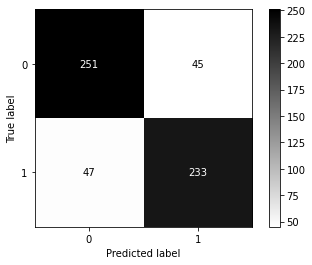

In [100]:
plot_confusion_matrix(Logregres, X_test, y_test, cmap='binary')
plt.show()

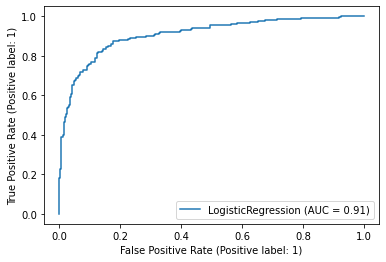

In [68]:
plot_roc_curve(Logregres, X_test, y_test)
plt.show()

In [ ]:
test = pd.read_table(r"C:/Users/CptCu/Desktop/dataset/test.tsv")
test.head()

In [ ]:
TOKEN_RE = re.compile(r'[а-яё]+')
russian_stopwords = stopwords.words("russian")
lemmatizer = pymorphy2.MorphAnalyzer()

def tokenize_text(txt, min_lenght_token=2):
    txt = txt.lower()
    all_tokens = TOKEN_RE.findall(txt)
    return [token for token in all_tokens if len(token) >= min_lenght_token]

def remove_stopwords(tokens):
    return list(filter(lambda token: token not in russian_stopwords, tokens))

def lemmatizing(tokens):
    return [lemmatizer.parse(token)[0].normal_form for token in tokens]

def text_cleaning(txt):
    tokens = tokenize_text(txt)
    tokens  = lemmatizing(tokens)
    tokens = remove_stopwords(tokens)
    return ' '.join(tokens)

In [ ]:
tqdm.pandas()

df_token_test = test.copy()
df_token_test['title'] = df_token_test['title'].progress_apply(text_cleaning)
df_token_test.head()

In [ ]:
clean_text_test = df_token_test.copy()
clean_text_test.head(10)

In [ ]:
corpus = clean_text_test['title'].values

text = ' '.join(corpus)
counter = Counter(text.split())
sorted_counter = counter.most_common()
sorted_counter[:5]

In [ ]:
#проблемы

In [ ]:
train_corpus_test =  clean_text['title'].values
test_corpus_test =  clean_text_test['title'].values

y_train = clean_text['is_fake']
y_test = df_test['is_fake']
#y_test = Logregres.predict(clean_text_test['title'])

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(2,4), analyzer='char_wb', max_df=0.8, min_df=10)
X_train = vectorizer.fit_transform(train_corpus_test)
X_test = vectorizer.transform(test_corpus_test)

In [ ]:
Logregres = LogisticRegression(max_iter=10000, C=3, solver='liblinear')
Logregres.fit(X_train, y_train)
y_pred = Logregres.predict(X_test)